## Import libs

In [2]:
# data processing
import pandas as pd
import numpy as np
# visuals and plotting
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()
# learning
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
# directory view
import os
import io
%matplotlib inline
sns.set(style="white")

## Import Data

In [3]:
# get csv data with pandas and assign to the df variable
# use the full relative path, remember to change the \ to a /
url = 'C:/Users/sbiggs/Desktop/esp_enrollment_data.csv'
df = pd.read_csv(url, thousands = ',')

## View imported data

In [4]:
print('Null values?',df.isnull().values.any())
print()
print('rows and columns',df.shape)
print('')
print('Sample data:')
print(df.head(10))

Null values? False

rows and columns (165, 8)

Sample data:
  Week Start Date  Week  Year  Seasonality  All Direct Enrollments  \
0        1/5/2015     2  2015            1                    2493   
1       1/12/2015     3  2015            1                    2303   
2       1/19/2015     4  2015            1                    2158   
3       1/26/2015     5  2015            1                    2366   
4        2/2/2015     6  2015            1                    2546   
5        2/9/2015     7  2015            1                    2905   
6       2/16/2015     8  2015            1                    2253   
7       2/23/2015     9  2015            1                    2311   
8        3/2/2015    10  2015            1                    2327   
9        3/9/2015    11  2015            1                    2046   

   Media Spend  LN (Media Spend)  Media Spend^2  
0     190947.0         12.159752    36460779723  
1     186806.0         12.137824    34896320983  
2     201345.0     

In [5]:
# print unique values
print(df.Seasonality.unique())

[1 0]


In [6]:
# change a columns type 
df['Seasonality'] = df.Seasonality.astype('category')

In [7]:
# get data info w/types
print("info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 8 columns):
Week Start Date           165 non-null object
Week                      165 non-null int64
Year                      165 non-null int64
Seasonality               165 non-null category
All Direct Enrollments    165 non-null int64
Media Spend               165 non-null float64
LN (Media Spend)          165 non-null float64
Media Spend^2             165 non-null int64
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 9.4+ KB
info: None


In [8]:
# get data column names
print(df.columns)

Index(['Week Start Date', 'Week', 'Year', 'Seasonality',
       'All Direct Enrollments', 'Media Spend', 'LN (Media Spend)',
       'Media Spend^2'],
      dtype='object')


In [9]:
# if you want to change column names, follow the example below to accomplish this
df = df.rename(index=str,
              columns={'Week Start Date':'date',
                      'Week':'week_num',
                      'Year': 'year',
                      'Seasonality':'seasn',
                      'All Direct Enrollments':'enrollments',
                      'Media Spend':'spend',
                      'LN (Media Spend)': 'ln_spend',
                      'Media Spend^2':'spend_two'})

In [10]:
print(df.columns)

Index(['date', 'week_num', 'year', 'seasn', 'enrollments', 'spend', 'ln_spend',
       'spend_two'],
      dtype='object')


In [11]:
# if needed, drop columns
# remove_columns = ['column_1', 'columns_2']
remove_columns = ['spend_two']
df = df.drop(remove_columns, 1)

In [12]:
# view basic stats about your data
print(df.describe())

         week_num         year  enrollments          spend    ln_spend
count  165.000000   165.000000   165.000000     165.000000  165.000000
mean    25.642424  2016.109091  2020.466667  207684.563636   12.153663
std     15.478132     0.917434   467.973310  101111.911045    0.403910
min      1.000000  2015.000000  1323.000000   80521.000000   11.296272
25%     12.000000  2015.000000  1705.000000  140915.000000   11.855913
50%     25.000000  2016.000000  1844.000000  173222.000000   12.062330
75%     39.000000  2017.000000  2365.000000  237409.000000   12.377539
max     53.000000  2018.000000  3540.000000  628819.000000   13.351599


## Visualize Data

In [13]:
# Create and correllation function
def plot_corr(df, size=10):
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

In [14]:
# view basic correlation matrix
corr = df.corr()
print(corr)

             week_num      year  enrollments     spend  ln_spend
week_num     1.000000 -0.181879    -0.311794  0.016774  0.048506
year        -0.181879  1.000000     0.381072  0.550095  0.529186
enrollments -0.311794  0.381072     1.000000  0.665307  0.679392
spend        0.016774  0.550095     0.665307  1.000000  0.967282
ln_spend     0.048506  0.529186     0.679392  0.967282  1.000000


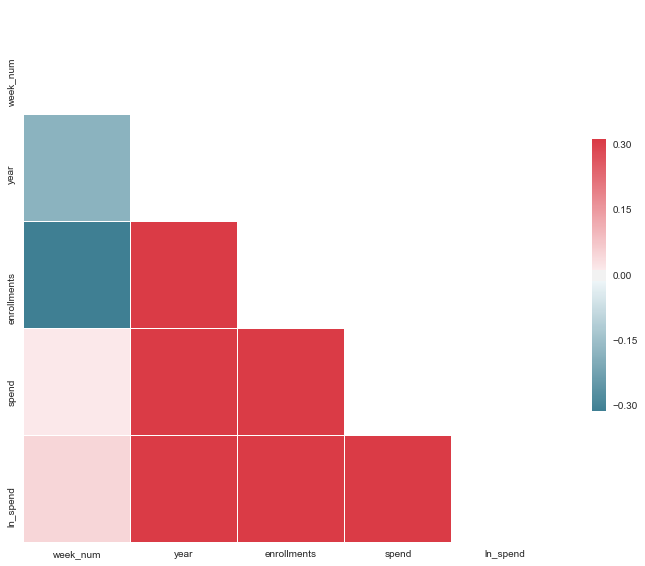

In [15]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

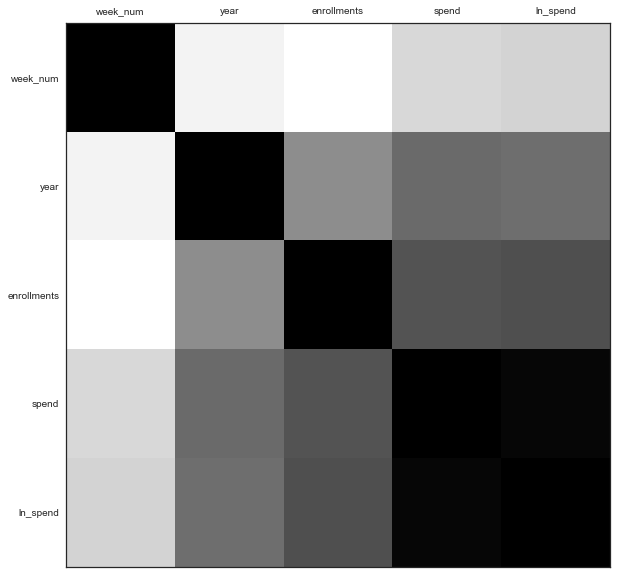

In [16]:
plot_corr(df)

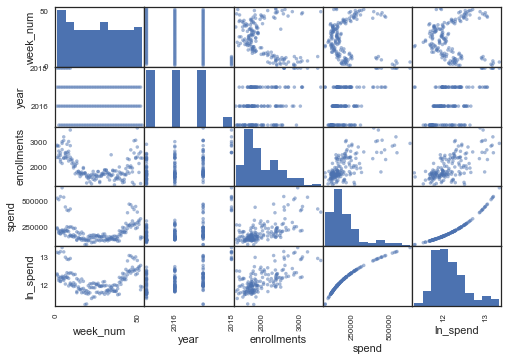

In [17]:
scatter_matrix(df)
plt.show()

## Model the data

In [18]:
# view columns (again) for reference
df.columns

Index(['date', 'week_num', 'year', 'seasn', 'enrollments', 'spend',
       'ln_spend'],
      dtype='object')

In [19]:
# assign your columns to a variable
ind = df['enrollments']
pred_1 = df['spend']
pred_2 = df['seasn']
# create the model and enter your x predictor/independant variable and your y your response/dependant variable. 
# left of ~ is your response variable, right of ~ is your predictor
# model = smf.ols(formula='y ~ x', data = df)
# to run multivariate scenarios assign additional predictors and concat on right side of ~
# multivariate example: model = smf.ols(formula='ind ~ pred_1 + pred_2 + pred_3', data = df)
# simple regression example: model = smf.ols(formula='ind ~ pred_1', data = df)
model = smf.ols(formula='ind ~ pred_1 + pred_2', data = df)

In [20]:
# create statsmodel results
results =  model.fit()
# view results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ind   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     199.7
Date:                Wed, 30 May 2018   Prob (F-statistic):           1.90e-44
Time:                        14:56:53   Log-Likelihood:                -1145.6
No. Observations:                 165   AIC:                             2297.
Df Residuals:                     162   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1427.2550     45.252     31.540      

In [21]:
print(results.params)

Intercept      1427.255021
pred_2[T.1]     561.930067
pred_1            0.001790
dtype: float64


In [22]:
# view individual results
print('coeffecient:', results.params['pred_1'])

coeffecient: 0.001790432805635209


In [23]:
# confidence intervals
print(results.conf_int())

                       0            1
Intercept    1337.896007  1516.614034
pred_2[T.1]   471.600252   652.259883
pred_1          0.001353     0.002228


In [24]:
# p-values
results.pvalues['pred_1']

1.4523483541179852e-13

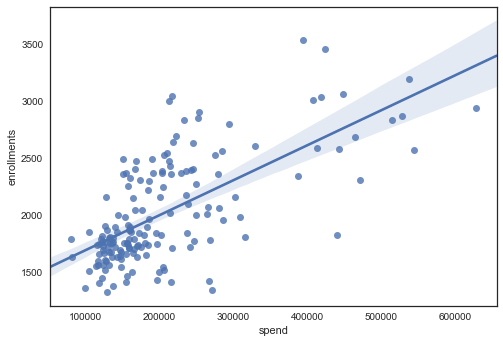

In [25]:
# plot current model
sns.regplot(pred_1, ind, data=df);

In [36]:
lm = LinearRegression()
lm
X = df['enrollments']

In [ ]:
# lm.fit(X,pred_1)

## Output

In [26]:
# write to csv
# df.to_csv('esp.csv')